In [1]:
pip install nest_asyncio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import nest_asyncio 
nest_asyncio.apply()

import HABSlib as hb


In [3]:
hb.handshake(base_url="http://135.237.144.125/", user_id='8d60e8693a9560ee57e8eba3')


       HUMAN        AUGMENTED        BRAIN         SYSTEMS     
   ----------------------------------------------------------- 
   ▒▒▒▒     ▒▒▒▒     ░▒▒▒▒▒░     ▒▒▒▒▒▒▒▒▒▒▒▒░   ░▒▒▒▒▒▒▒▒▒░   
   ▒▒▒▒     ▒▒▒▒    ░▒▒▒▒▒▒▒░             ░▒▒▒▒ ░▒▒▒░     ░▒░  
   ▒▒▒▒▒▒▒▒▒▒▒▒▒   ░▒▒▒▒ ▒▒▒▒░   ▒▒▒▒▒▒▒▒▒▒▒▒▒   ░▒▒▒▒▒▒▒▒▒░   
   ▒▒▒▒     ▒▒▒▒  ░▒▒▒▒   ▒▒▒▒░  ▒▒▒▒     ░▒▒▒▒ ░▒░     ░▒▒▒░  
   ▒▒▒▒     ▒▒▒▒ ░▒▒▒▒     ▒▒▒▒░ ▒▒▒▒▒▒▒▒▒▒▒▒░   ░▒▒▒▒▒▒▒▒▒░   
   ----------------------------------------------------------- 
   version: 0.1.33

Handshake (RSA) successful.
Handshake (AES) successful.


True

In [ ]:
# Utilisation du pipeline
file_path = 'votre_fichier_eeg.fif'  # Remplacez par le chemin de votre fichier EEG

In [6]:
from datetime import datetime
from scipy import signal

# Pipe setup and sending data
# preprocessing setup, requires a bit of knowledge about the data to process
b_notch, a_notch = signal.iirnotch(50., 2.0, 250)
sos = signal.butter(10, [1, 40], 'bandpass', fs=250, output='sos')

def send_pipe(pipeline,params):
pipeline='/filtering/artifact/mean'
params={ 
        # dictionary, the order does not matter, they will be called by key
        "filtering": {
            'a_notch': a_notch.tolist() ,
            'b_notch':b_notch.tolist(),
            'sos': sos.tolist(),
        },
        "artifact":{},
        "mean":{},
        # "std":{},
        # "var":{},
        # "kurtosis":{},
        # "skew":{},
        # "ifms":{},
        # "delta":{},
        # "theta":{},
        "alpha":{},
        # "beta":{},
        # "gamma":{},
        # "zerocrossing":{},
        # "hjorthmobility":{},
        # "hjorthcomplexity":{},
        # "entropy":{},
        # "fractaldim":{},
        # "hurst":{},
        # "correlatedim":{},
        # "selfaffinity":{},
        # "relative":{'band': 'alpha'},
        # "asymmetry":{'band':'alpha', 'channelA':0, 'channelB':2},
        # "correlation":{'band':'alpha', 'channelA':0, 'channelB':2},
        # "phaselocking":{'band':'alpha', 'channelA':0, 'channelB':2},
    }
print(params)
print(pipeline) 
session_id = hb.acquire_send_pipe(pipeline,params,user_id='8d60e8693a9560ee57e8eba3', 
    date=datetime.today().strftime('%Y-%m-%d'), 

    board="SYNTHETIC",
    extra={
        "eeg_channels": 4,
        "sampling_rate": 250,
        "noise": 1,
        "artifacts": 0.001,
        "modulation_type": 'random',
        "preset": 'drowsy', # None, # 'focus', 'alert', 'relaxed', 'drowsy'
        "sequence": None, # [("focus", 20), ("relaxed", 20)],
        "correlation_strength": 0.5,
        "power_law_slope": 0.8
    },
    serial_number="",     
    stream_duration=10, # 10 sec
    buffer_duration=5, # 5 sec epoch
    session_type="phaselocking test", 
    tags=['Happy']
)
print("this session:", session_id)

{'filtering': {'a_notch': [1.0, -0.4664690173352599, 0.5095254494944288], 'b_notch': [0.7547627247472144, -0.4664690173352599, 0.7547627247472144], 'sos': [[6.824570222435875e-05, 0.0001364914044487175, 6.824570222435875e-05, 1.0, -0.6272888069463983, 0.10394004759014157], [1.0, 2.0, 1.0, 1.0, -0.6494416765837244, 0.15641110034034927], [1.0, 2.0, 1.0, 1.0, -0.700072740520035, 0.2693710561993723], [1.0, 2.0, 1.0, 1.0, -0.792801473540754, 0.4624898768839381], [1.0, 2.0, 1.0, 1.0, -0.9528349226272611, 0.77583222965524], [1.0, -2.0, 1.0, 1.0, -1.9486965996241836, 0.9493723815173682], [1.0, -2.0, 1.0, 1.0, -1.9543918792167805, 0.9550565695179943], [1.0, -2.0, 1.0, 1.0, -1.9645082320539464, 0.9651571092862283], [1.0, -2.0, 1.0, 1.0, -1.9774302481011123, 0.9780660680311145], [1.0, -2.0, 1.0, 1.0, -1.9918716106796392, 0.992502154824741]]}, 'artifact': {}, 'mean': {}, 'alpha': {}}
/filtering/artifact/mean
{'user_id': '8d60e8693a9560ee57e8eba3', 'session_date': '2024-07-22', 'session_type': 'pha

In [7]:
user_data = hb.get_user_by_id(user_id='8d60e8693a9560ee57e8eba3')
print(user_data)


User not found: {"message":"Your role does not grant access to this endpoint. Check your Access plan on habs.ai/users. (ver: BOS_alpha_)"}

None


In [8]:
from datetime import datetime

session_id = hb.acquire_send_raw(
    user_id='8d60e8693a9560ee57e8eba3', 
    date=datetime.today().strftime('%Y-%m-%d'), 
    board="SYNTHETIC", 
    extra={
        "eeg_channels": 16,
        "sampling_rate": 250,
        "noise": 1,
        "artifacts": 0.001,
        "modulation_type": 'random',
        "preset": 'focus', # None # 
        "sequence": None, # [("focus", 20), ("relaxed", 20)],
        "correlation_strength": 0.5
    },
    serial_number="", 
    stream_duration=20, 
    buffer_duration=5
)
print("this session:", session_id)

Session successfully created.

Session initialized. You can visualize it here:
  https://habs.ai/live.html?session_id=669e4ef2cc485c74bb9511c9 

{'user_id': '8d60e8693a9560ee57e8eba3', 'session_date': '2024-07-22', 'session_type': '', 'session_tags': []}
Metadata validation successful!
Connecting to the headset...
Headset connected successfully!
....
Stopping data streaming...
Releasing session...
this session: 669e4ef2cc485c74bb9511c9


In [9]:
import numpy as np

results = hb.get_data_by_session(user_id='8d60e8693a9560ee57e8eba3', session_id='669e4ef2cc485c74bb9511c9')
data = np.array(results)
print(data.shape)
print(data)

Retrieved data successfully.
(16, 5000)
[[-5.74401444e+00 -1.02667020e+00 -7.97558172e-01 ... -1.50929842e-01
   3.67800972e-01  3.21685547e+00]
 [-1.05078803e+01  4.17273127e-02 -5.68585479e+00 ...  2.06870809e+00
   3.37227088e+00  3.99484450e+00]
 [ 3.57575438e+00  2.43440989e+00  1.87204516e+00 ...  2.12733252e+00
   3.63501221e+00  4.39146683e+00]
 ...
 [-1.86034134e+02  2.01674821e+02  3.93137053e+02 ...  1.82787546e+02
   3.18639650e+01  5.87765452e+01]
 [ 2.28432867e+01  2.11267782e+02  1.44590426e+02 ...  7.08066771e+00
   4.54630837e+02  1.32980132e+02]
 [ 2.10339261e+02  3.79252380e+02  1.05873455e+02 ...  3.04082508e+02
  -3.03275296e+01  2.10593833e+02]]


In [10]:
print(data.shape)

(16, 5000)


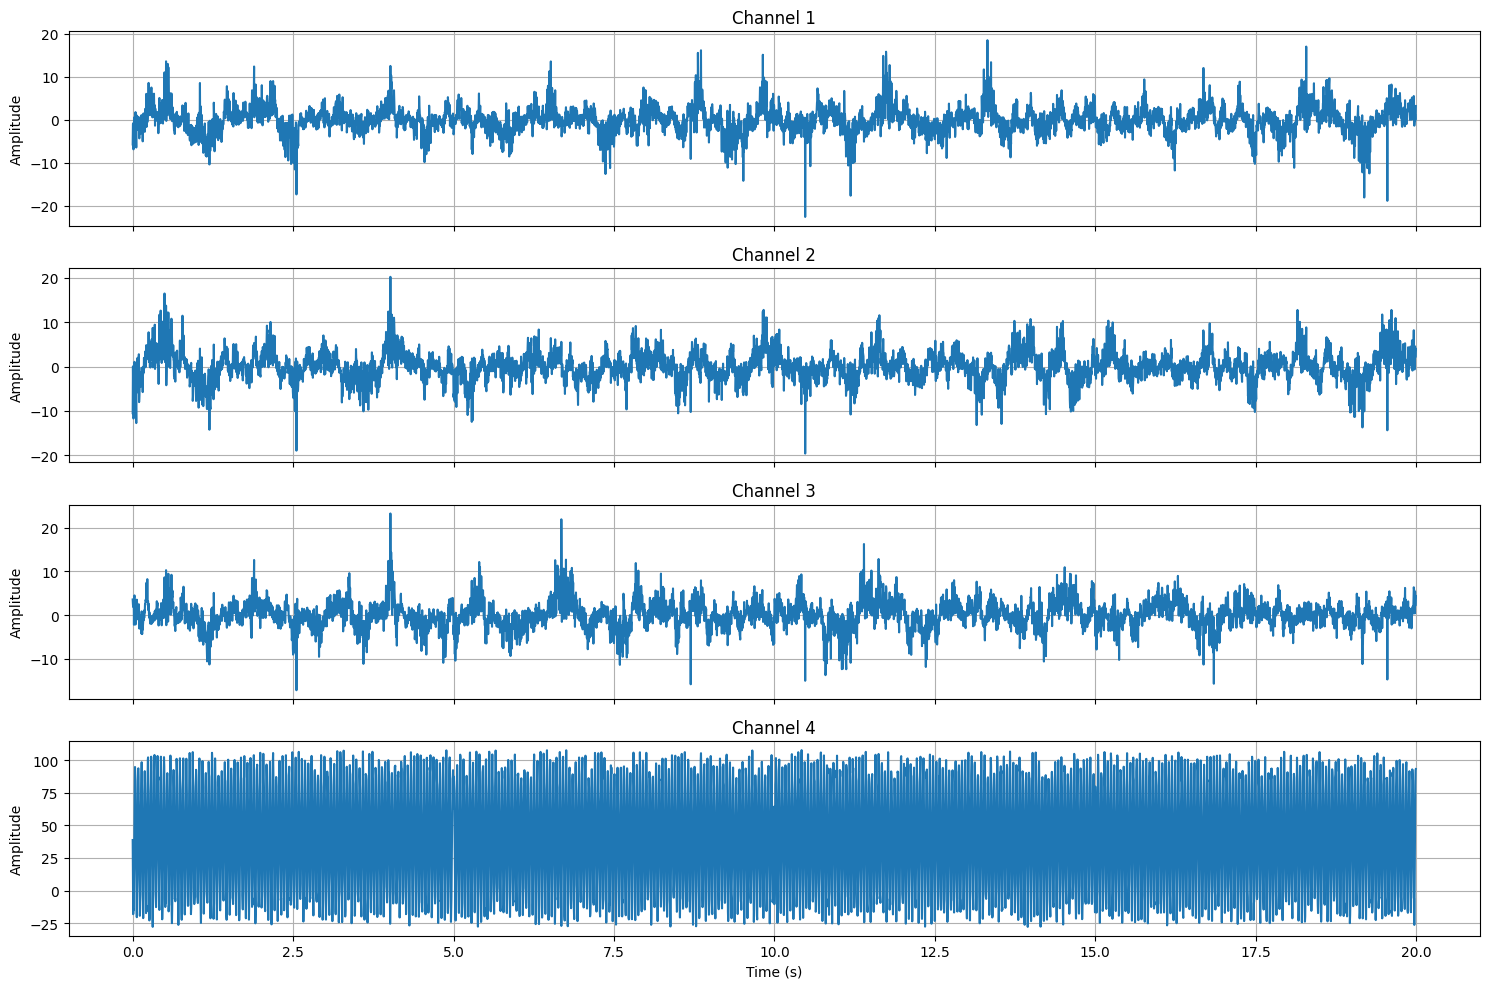

In [11]:
import matplotlib.pyplot as plt

samples_per_second = 250
num_channels=4 # how many you want to plot
    
time = np.arange(data.shape[1]) / samples_per_second
fig, axes = plt.subplots(num_channels, 1, figsize=(15, 10), sharex=True)

if num_channels == 1:
    axes = [axes]

for i, ax in enumerate(axes[:num_channels]):
    ax.plot(time, data[i])
    ax.set_title(f'Channel {i+1}')
    ax.set_ylabel('Amplitude')
    ax.grid(True)

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

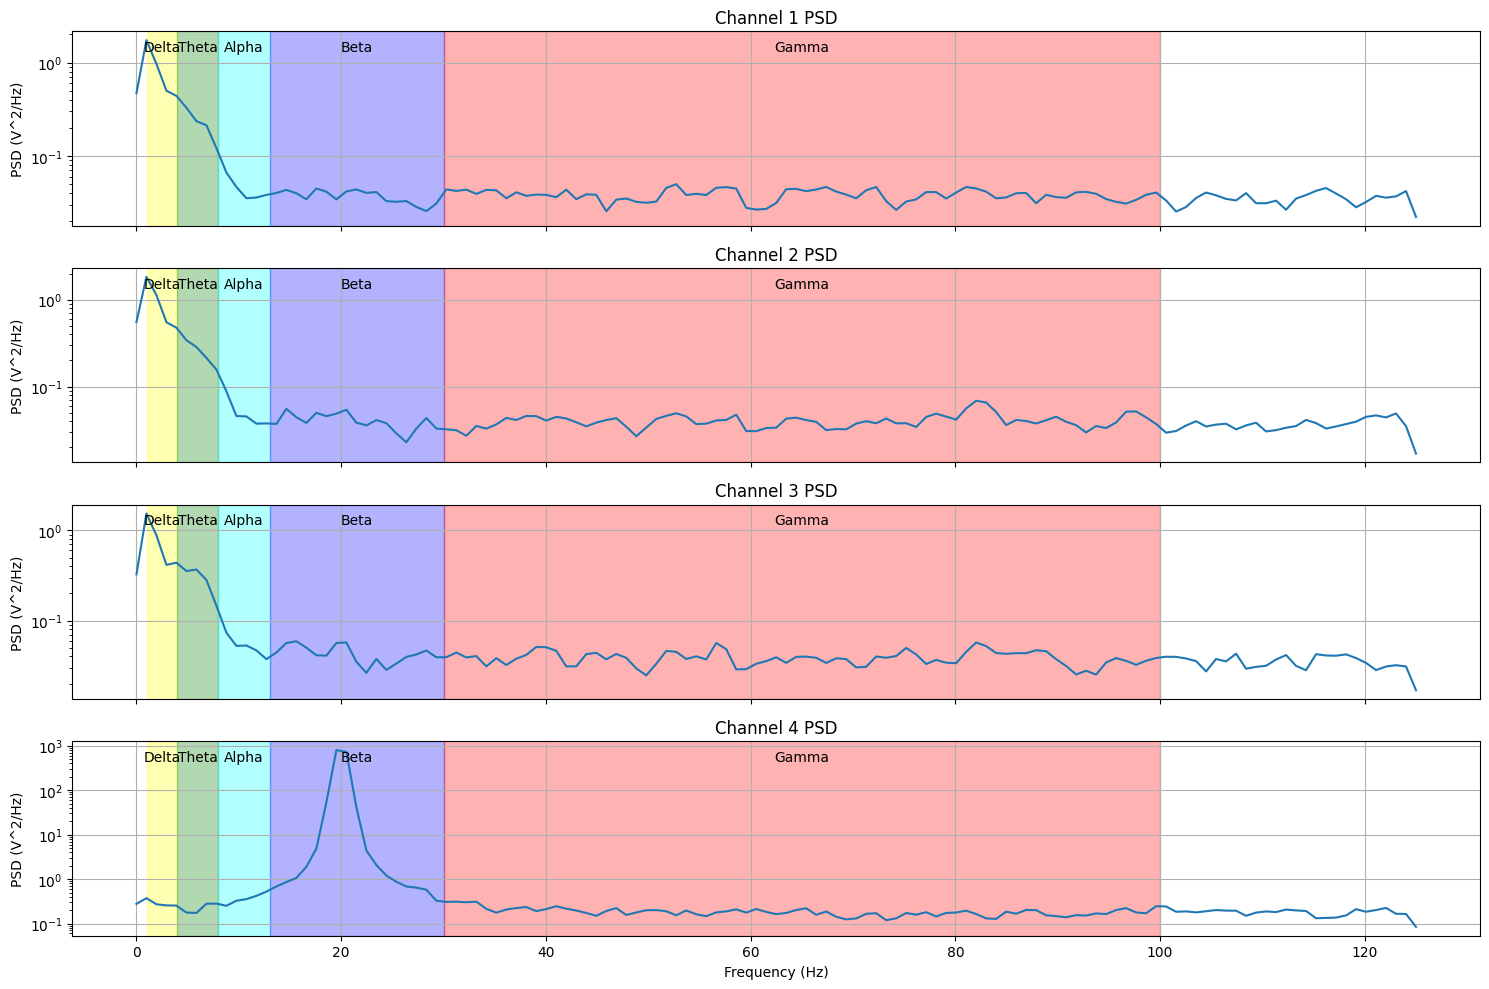

NameError: name 'alpha_amp' is not defined

In [16]:
from scipy import signal

# Define frequency bands
bands = {
    'Delta': (1, 4, 'yellow'),
    'Theta': (4, 8, 'green'),
    'Alpha': (8, 13, 'cyan'),
    'Beta': (13, 30, 'blue'),
    'Gamma': (30, 100, 'red')
}

fig, axes = plt.subplots(num_channels, 1, figsize=(15, 10), sharex=True)

if num_channels == 1:
    axes = [axes]

for i in range(num_channels):
    # Plotting the PSD
    freqs, psd = signal.welch(data[i], fs=samples_per_second)
    axes[i].semilogy(freqs, psd)
    axes[i].set_title(f'Channel {i+1} PSD')
    axes[i].set_ylabel('PSD (V^2/Hz)')
    axes[i].grid(True)

    # Highlighting frequency bands
    for band, (low, high,col) in bands.items():
        axes[i].axvspan(low, high, color=col, alpha=0.3)
        axes[i].text((low + high) / 2, max(psd), band, horizontalalignment='center', verticalalignment='top')

axes[-1].set_xlabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


